# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Regularization and Cross-Validation
Week 3 | Lesson 2.4

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Explain the connection between the bias-variance tradeoff and the train-test split
- Perform a split of data into testing and training sets
- Make a prediction on the ISE value using a Linear Regression

![](assets/the_sweet_spot.png)

In [1]:
from os import chdir 
chdir('../../../lib/')

In [2]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

## Linear Regression

lr.coef_: [ 0.39390555]
lr.intercept_: -0.0318043430268
training set score: 0.67
test set score: 0.66


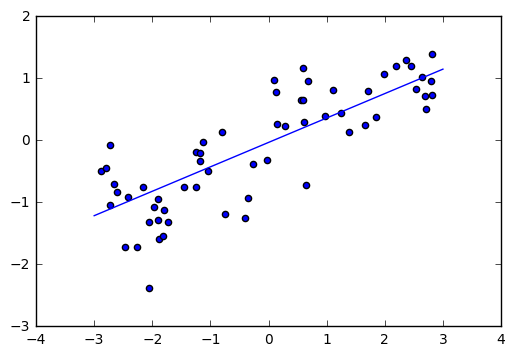

In [3]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
xfit = np.linspace(-3,3,100)
plt.scatter(X, y)
plt.plot(xfit, xfit*lr.coef_ + lr.intercept_)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

### Linear Regression on the Boston Data

In [7]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

training set score: 0.95
test set score: 0.61


## Ridge Regression

Mathematically, Ridge penalizes the L2 norm of the coefficients, or the Euclidean length of w.

From lecture 2.4:

> The length of the vector, $\mathbf v$ is defined as

> $$||\mathbf v||= \sqrt{\mathbf v \cdot \mathbf v}$$

The length of a vector **IS** the L2 norm.

$$ \texttt{norm}_2 = \sqrt{\mathbf v \cdot \mathbf v} = \sqrt{v_1^2+v_2^2+\dots+v_n^2}$$

In [8]:
vector_length = lambda x: np.sqrt(np.dot(x, x))
from numpy.linalg import norm

In [9]:
vector_length((3,4))

5.0

In [10]:
norm((3,4))

5.0

In [11]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

training set score: 0.89
test set score: 0.75


In [12]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

training set score: 0.79
test set score: 0.64


In [13]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

training set score: 0.93
test set score: 0.77


In [15]:
X.shape

(506, 104)

In [14]:
plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.ylim(-25, 25)
plt.legend()

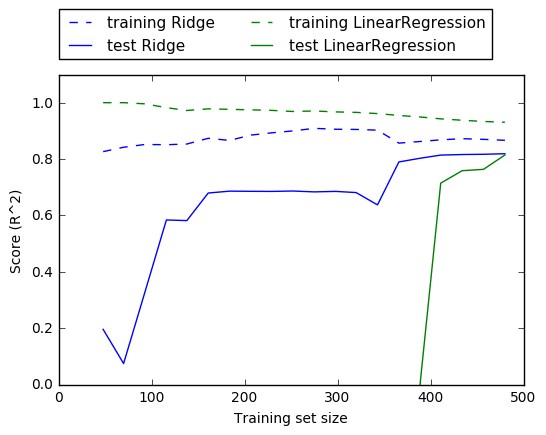

In [16]:
mglearn.plots.plot_ridge_n_samples()

- Without enough data standard regression is useless
- As more data becomes available, both models improve and standard regression eventually catches up to ridge regression
- Ridge regression has a decreased *training* performance -- it is harder for the model to "memorize the data"

## The Lasso

Mathematically, the Lasso penalizes the L1 norm of the coefficients, or sum of the absolute values of the coefficients.

$$ \texttt{norm}_1 = \rvert v_1 \rvert+ \rvert v_2 \rvert+\dots+ \rvert v_n \rvert = \sum \rvert v_i \rvert$$

Because of this many coefficients are exactly zero. This is equivalent to saying that these features are not used. 

In [17]:
from sklearn.linear_model import Lasso

In [18]:
lasso = Lasso().fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

training set score: 0.29
test set score: 0.21
Number of features used: 4


In [19]:
lasso01 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso01.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso01.coef_ != 0)))

training set score: 0.90
test set score: 0.77
Number of features used: 33


In [20]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))

training set score: 0.95
test set score: 0.64
Number of features used: 94


In [26]:
lasso.coef_[lasso.coef_ != 0]

array([-5.3529079 , -1.05063037, -3.3104274 , -0.41386744])

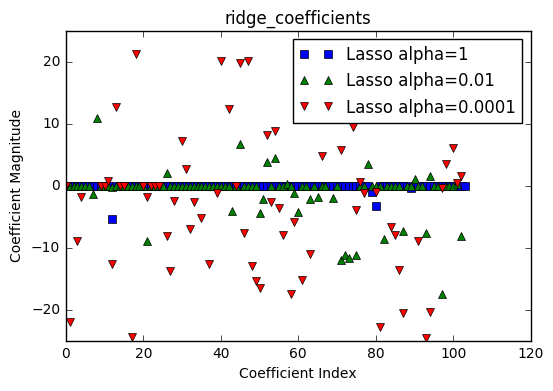

In [21]:
plt.title("ridge_coefficients")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso01.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.ylim(-25, 25)
plt.legend()

---

# Cross-Validation

In [22]:
mglearn.plots.plot_cross_validation()

In $\mathbf K$-**Fold Cross-Validation** rather than splitting the data into a training set and a test set, the data is split $K$ times and $K$ models are developed.

We measure then accuracy of each model.

In [27]:
from sklearn.model_selection import cross_val_score

In [63]:
from sklearn.metrics import make_scorer, mean_squared_error
MSE = make_scorer(mean_squared_error, greater_is_better=False)

In [29]:
X, y = mglearn.datasets.load_extended_boston()

In [34]:
cross_val_scores = cross_val_score(Lasso(), X, y, scoring=MSE, cv=504)
cross_val_scores

array([  1.88751846e+00,   9.11128288e+01,   1.44051136e+02,
         2.00929506e+01,   4.85722343e-02,   2.86445349e+01,
         1.16439030e+01,   1.10654964e+01,   4.40054653e+01,
         1.62378902e+01,   8.45471587e-01,   9.59201335e+00,
         2.23603790e+01,   1.30587331e+01,   1.06880808e+00,
         2.15145558e+01,   8.57150799e+00,   2.18562219e+01,
         5.29456138e+01,   6.76503969e+00,   3.75485607e+01,
         4.29691800e+01,   3.78081803e+01,   6.23972116e+01,
         2.96496898e+01,   4.65377140e+01,   1.56877561e+01,
         2.39185735e+00,   6.30034418e+01,   6.13735061e+01,
         4.40187554e+01,   6.88386823e+01,   5.64248880e+01,
         1.93882390e+01,   9.21710640e+00,   7.19852502e+00,
         1.39994371e+00,   3.76569801e+01,   9.60917559e+01,
         3.52051302e+00,   5.92187856e-01,   2.15837701e-01,
         5.93887494e+00,   1.82036520e+01,   8.12385647e+00,
         2.56716391e+01,   2.60286442e+01,   8.29775082e+00,
         1.05265979e+01,

In [32]:
cross_val_scores = cross_val_score(Lasso(), X, y, scoring=MSE)
cross_val_scores

array([  48.47879498,  138.11478786,  115.39576661])

Mean MSE for alpha= 1e-05 is 772195.32
Mean MSE for alpha=0.0001 is 529763.69
Mean MSE for alpha= 0.001 is 89642.77
Mean MSE for alpha=  0.01 is 3213.63
Mean MSE for alpha=   0.1 is 4095.72
Mean MSE for alpha=     1 is 240.00
Mean MSE for alpha=    10 is 169.93
Mean MSE for alpha=   100 is 89.20
Mean MSE for alpha=  1000 is 102.61


(-5, 1000)

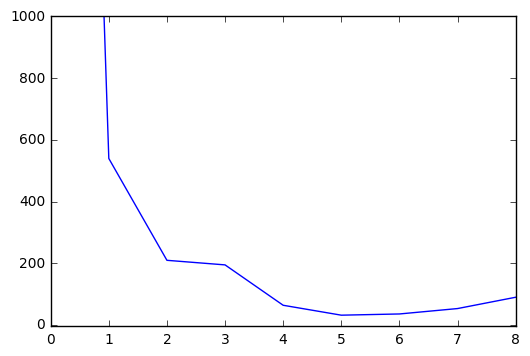

In [43]:
alphas = [1E-5, 1E-4, 1E-3, 0.01, 0.1, 1, 10, 100, 1000]

for alp in alphas:
    RIDGE_REGRESSOR = Ridge(alpha=alp, max_iter=1E5, normalize=True)
    cross_val_scores = cross_val_score(RIDGE_REGRESSOR, X, y, scoring=MSE)
    mean_mse = np.mean(cross_val_scores)
    print("Mean MSE for alpha={:6} is {:.2f}".format(alp, mean_mse))
                                             
mn_mn_sq_ers = [np.mean(cross_val_score(Ridge(alpha=alp), X, y, scoring=MSE)) 
                for alp in alphas]
plt.plot(mn_mn_sq_ers)
plt.ylim(-5, 1000)

Mean MSE for alpha= 1e-05 is 701456.35
Mean MSE for alpha=0.0001 is 196364.98
Mean MSE for alpha= 0.001 is 202.54
Mean MSE for alpha=  0.01 is 32.42
Mean MSE for alpha=   0.1 is 50.53
Mean MSE for alpha=     1 is 111.15
Mean MSE for alpha=    10 is 111.15
Mean MSE for alpha=   100 is 111.15
Mean MSE for alpha=  1000 is 111.15


(-5, 1000)

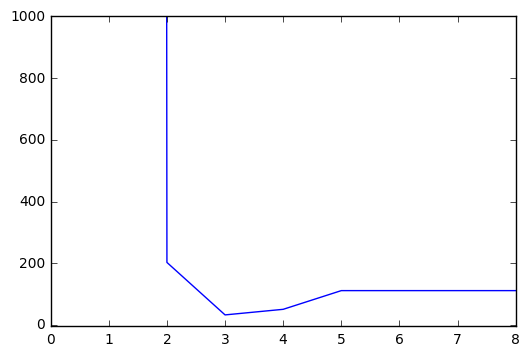

In [44]:
alphas = [1E-5, 1E-4, 1E-3, 0.01, 0.1, 1, 10, 100, 1000]

for alp in alphas:
    LASSO_REGRESSOR = Lasso(alpha=alp, max_iter=1E5, normalize=True)
    cross_val_scores = cross_val_score(LASSO_REGRESSOR, X, y, scoring=MSE)
    mean_mse = np.mean(cross_val_scores)
    print("Mean MSE for alpha={:6} is {:.2f}".format(alp, mean_mse))
                                             
mn_mn_sq_ers = [np.mean(cross_val_score(Lasso(alpha=alp, max_iter=1E5, normalize=True), X, y, scoring=MSE)) for alp in alphas]
plt.plot(mn_mn_sq_ers)
plt.ylim(-5, 1000)

## The ElasticNet 

The best of both worlds.

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function, for an $\alpha$ as a learning rate and $\gamma$ as an `l1 ratio`:


$$\frac{1}{2n}\cdot\texttt{norm}_2(y - Xw)+\alpha\gamma\cdot\texttt{norm}_1(w)+\alpha(1-\gamma)\cdot\texttt{norm}_2(w)$$



In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
elastic_net = ElasticNet().fit(X_train, y_train)
print("training set score: {:.2f}".format(elastic_net.score(X_train, y_train)))
print("test set score: {:.2f}".format(elastic_net.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(elastic_net.coef_ != 0)))

training set score: 0.33
test set score: 0.22
Number of features used: 38


In [48]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.2).fit(X_train, y_train)
print("training set score: {:.2f}".format(elastic_net.score(X_train, y_train)))
print("test set score: {:.2f}".format(elastic_net.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(elastic_net.coef_ != 0)))

training set score: 0.71
test set score: 0.53
Number of features used: 77


### NOW WE HAVE TWO PARAMETERS TO TUNE!!!

## Grid Search

An exhaustive search over specified parameter values for an estimator.

In [49]:
from sklearn.model_selection import GridSearchCV

In [66]:
elastic_net = ElasticNet()
parameters = { 'alpha' : [1E-4, 1E-3, 1E-2, 0.1, 1, 10, 100, 1000], 
              'l1_ratio' : np.linspace(0,1,11)}
REGRESSOR = GridSearchCV(elastic_net, parameters, scoring=MSE)
REGRESSOR.fit(X, y)

TypeError: Singleton array 1.0 cannot be considered a valid collection.

In [54]:
REGRESSOR.best_estimator_

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True,
      l1_ratio=0.90000000000000002, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
import pandas as pd
import seaborn as sns

In [52]:
grid_search_results = pd.DataFrame(REGRESSOR.cv_results_)

In [53]:
grid_search_results

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.055706         0.002543       116.895337          6.274532   
1        0.048977         0.000807       124.951870          6.215525   
2        0.045694         0.000530       134.391864          6.152931   
3        0.056613         0.001139       146.500311          6.085898   
4        0.048257         0.000418       160.617497          6.012978   
5        0.057579         0.001585       176.801557          5.933093   
6        0.039616         0.000396       194.302750          5.844803   
7        0.039932         0.000446       215.931180          5.744627   
8        0.041921         0.000553       244.798967          5.624939   
9        0.041790         0.000511       277.540080          5.470618   
10       0.042774         0.000519       249.093371          5.247857   
11       0.047415         0.000460        34.946482          8.945566   
12       0.041826         0.000747        35.425872          8.778535   
13       0.043847         0.000532        36.147598          8.596565   
14       0.043276         0.000675        37.255581          8.400436   
15       0.039405         0.000622        38.624356          8.187641   
16       0.043274         0.000428        41.179569          7.955195   
17       0.041407         0.000541        45.811747          7.697795   
18       0.040918         0.000585        53.111301          7.406448   
19       0.035170         0.000455        63.243071          7.064727   
20       0.038380         0.000611        87.351337          6.648886   
21       0.035221         0.000740       208.878411          5.913520   
22       0.051830         0.000471        33.303437         14.435129   
23       0.030856         0.000386        33.043711         14.202502   
24       0.029988         0.000388        32.801717         13.956775   
25       0.030345         0.000362        32.501617         13.687667   
26       0.026973         0.000383        32.172732         13.385202   
27       0.025698         0.000435        31.800252         13.058495   
28       0.024655         0.000378        31.364610         12.684557   
29       0.025709         0.000363        30.759808         12.244364   
..            ...              ...              ...               ...   
58       0.000986         0.000291       111.117152         79.085177   
59       0.000903         0.000254       111.117152         79.085177   
60       0.000960         0.000273       111.117152         79.085177   
61       0.000943         0.000275       111.117152         79.085177   
62       0.001015         0.000280       111.117152         79.085177   
63       0.000999         0.000286       111.117152         79.085177   
64       0.000923         0.000257       111.117152         79.085177   
65       0.001061         0.000280       111.117152         79.085177   
66       0.043447         0.000380       110.070614         78.037745   
67       0.000954         0.000262       111.117152         79.085177   
68       0.001008         0.000274       111.117152         79.085177   
69       0.000933         0.000263       111.117152         79.085177   
70       0.000879         0.000258       111.117152         79.085177   
71       0.000895         0.000333       111.117152         79.085177   
72       0.001016         0.000354       111.117152         79.085177   
73       0.000912         0.000255       111.117152         79.085177   
74       0.000933         0.000256       111.117152         79.085177   
75       0.000924         0.000261       111.117152         79.085177   
76       0.000905         0.000261       111.117152         79.085177   
77       0.044704         0.000455       111.010325         78.977176   
78       0.000920         0.000270       111.117152         79.085177   
79       0.001068         0.000480       111.117152         79.085177   
80       0.001002         0.000286       111.117152         79

In [55]:
grid_search_results.head(1)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.055706         0.002543       116.895337          6.274532   

  param_alpha param_l1_ratio                                params  \
0      0.0001              0  {u'alpha': 0.0001, u'l1_ratio': 0.0}   

   rank_test_score  split0_test_score  split0_train_score  split1_test_score  \
0               12           28.97403            7.371388          20.082764   

   split1_train_score  split2_test_score  split2_train_score  std_fit_time  \
0            7.499936         302.728823            3.952273      0.018311   

   std_score_time  std_test_score  std_train_score  
0        0.003018      131.065145         1.642924

In [56]:
grid_search_results['alpha'] = grid_search_results['params'].apply(lambda x: x['alpha'])
grid_search_results['l1_ratio'] = grid_search_results['params'].apply(lambda x: x['l1_ratio'])

In [57]:
grid_search_results.head(1)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.055706         0.002543       116.895337          6.274532   

  param_alpha param_l1_ratio                                params  \
0      0.0001              0  {u'alpha': 0.0001, u'l1_ratio': 0.0}   

   rank_test_score  split0_test_score  split0_train_score  split1_test_score  \
0               12           28.97403            7.371388          20.082764   

   split1_train_score  split2_test_score  split2_train_score  std_fit_time  \
0            7.499936         302.728823            3.952273      0.018311   

   std_score_time  std_test_score  std_train_score   alpha  l1_ratio  
0        0.003018      131.065145         1.642924  0.0001       0.0

In [58]:
grid_search_results_of_interest = grid_search_results[['mean_test_score', 'mean_train_score', 'alpha', 'l1_ratio']]

In [59]:
grid_search_results_of_interest.head()

mean_test_score  mean_train_score   alpha  l1_ratio
0       116.895337          6.274532  0.0001       0.0
1       124.951870          6.215525  0.0001       0.1
2       134.391864          6.152931  0.0001       0.2
3       146.500311          6.085898  0.0001       0.3
4       160.617497          6.012978  0.0001       0.4

In [ ]:
def get_mean_test_score(x,y):
    index = grid_search_results[(grid_search_results['alpha']==x) & (grid_search_results['l1_ratio'] == y)].index[0]
    return grid_search_results.get_value(index, 'mean_test_score')

In [62]:
xs = grid_search_results['alpha'].unique()
ys = grid_search_results['l1_ratio'].unique()

intensity = [[get_mean_test_score(x, y) for x in xs] for y in ys]

plt.xscale('log')
plt.pcolormesh(xs, ys, intensity, cmap='RdBu_r')
plt.colorbar() #need a colorbar to show the intensity scale